In [113]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'

In [2]:
!gpustat

/mnt/data/env/pyomic/lib/python3.8/site-packages/blessed/terminal.py:183: UserWarning: Failed to setupterm(kind='xterm-color'): setupterm: could not find terminfo database
  warnings.warn(msg)
clever                         Mon Aug 28 04:10:40 2023  525.105.17
[0] NVIDIA GeForce RTX 2080 Ti | 38°C,   0 % |  1613 / 11264 MB | zehuazeng(1184M) gdm(18M) gdm(90M) ustbjump(50M) ustbjump(9M)


In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [62]:
adata = sc.read('data/Zebrafish.h5ad')
adata

AnnData object with n_obs × n_vars = 2434 × 23974
    obs: 'Stage', 'gt_terminal_states', 'lineages'
    uns: 'Stage_colors', 'gt_terminal_states_colors', 'lineages_colors'
    obsm: 'X_force_directed'

In [63]:
adata=ov.pp.qc(adata,
              tresh={'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250})
adata

Calculate QC metrics
End calculation of QC metrics.
Original cell number: 2434
Begin of post doublets removal and QC plot
Running Scrublet
filtered out 7157 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 34.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:00:02)
Cells retained after scrublet: 2434, 0 removed.
End of post doublets removal and QC plots.
Filters application (seurat or mads)
Lower treshol

AnnData object with n_obs × n_vars = 2434 × 16817
    obs: 'Stage', 'gt_terminal_states', 'lineages', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'mt', 'n_cells'
    uns: 'Stage_colors', 'gt_terminal_states_colors', 'lineages_colors', 'scrublet'
    obsm: 'X_force_directed'

In [71]:
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=2000,)
adata

Begin robust gene identification
After filtration, 16817/16817 genes are kept. Among 16817 genes, 16817 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 2434 × 16817
    obs: 'Stage', 'gt_terminal_states', 'lineages', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'mean', 'var', 'highly_variable_features'
    uns: 'Stage_colors', 'gt_terminal_states_colors', 'lineages_colors', 'scrublet', 'log1p', 'hvg'
    obsm: 'X_force_directed'
    layers: 'counts'

In [72]:
adata3=adata.copy()
import scanpy as sc
#sc.pp.highly_variable_genes(adata3, n_top_genes=3000, flavor="seurat_v3")
adata3=adata3[:,adata3.var['highly_variable_features']==True]
adata3

View of AnnData object with n_obs × n_vars = 2434 × 3000
    obs: 'Stage', 'gt_terminal_states', 'lineages', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'mean', 'var', 'highly_variable_features'
    uns: 'Stage_colors', 'gt_terminal_states_colors', 'lineages_colors', 'scrublet', 'log1p', 'hvg'
    obsm: 'X_force_directed'
    layers: 'counts'

In [73]:
ov.pp.scale(adata3)
ov.pp.pca(adata3,layer='scaled',n_pcs=50)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [74]:
sc.pp.neighbors(adata3, n_neighbors=15, n_pcs=50,
               use_rep='scaled|original|X_pca')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [68]:
sc.tl.umap(adata3)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


In [75]:
adata3.obsm["X_mde"] = ov.utils.mde(adata3.obsm["scaled|original|X_pca"])

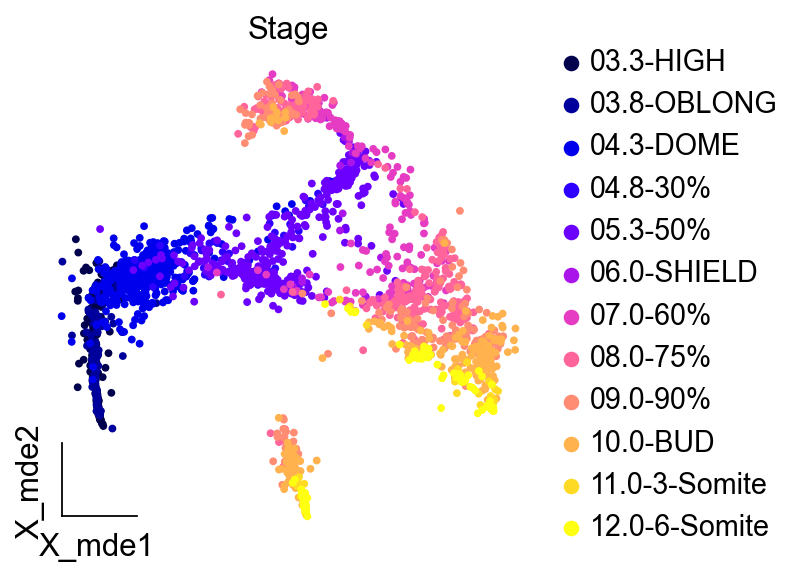

In [76]:
ov.utils.embedding(adata3,basis='X_mde', color=['Stage'], 
               cmap='PuRd',legend_loc='right margin',frameon='small')

In [77]:
import Epiverse as ev
ev.utils.lsi(adata3, n_components=20, n_iter=15)

In [192]:
import scltnn
ltnn_obj=scltnn.scLTNN(adata3,basis='X_lsi',input_dim=20,)

In [193]:
ltnn_obj.ANNmodel_load('model/model_20.h5')
ltnn_obj.cal_paga(use_rep='scaled|original|X_pca',resolution=2)
ltnn_obj.cal_model_time()

......calculate paga
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
......predict model_time


In [194]:
ltnn_obj.cal_exp_gene_value()

filtered out 2165 cells that have less than 200 genes expressed
filtered out 482 genes that are detected in less than 3 cells


In [195]:
adata3.obs['test_time']=(adata3.obs['p_latent_time']+adata3.obs['p_time_r'])/2

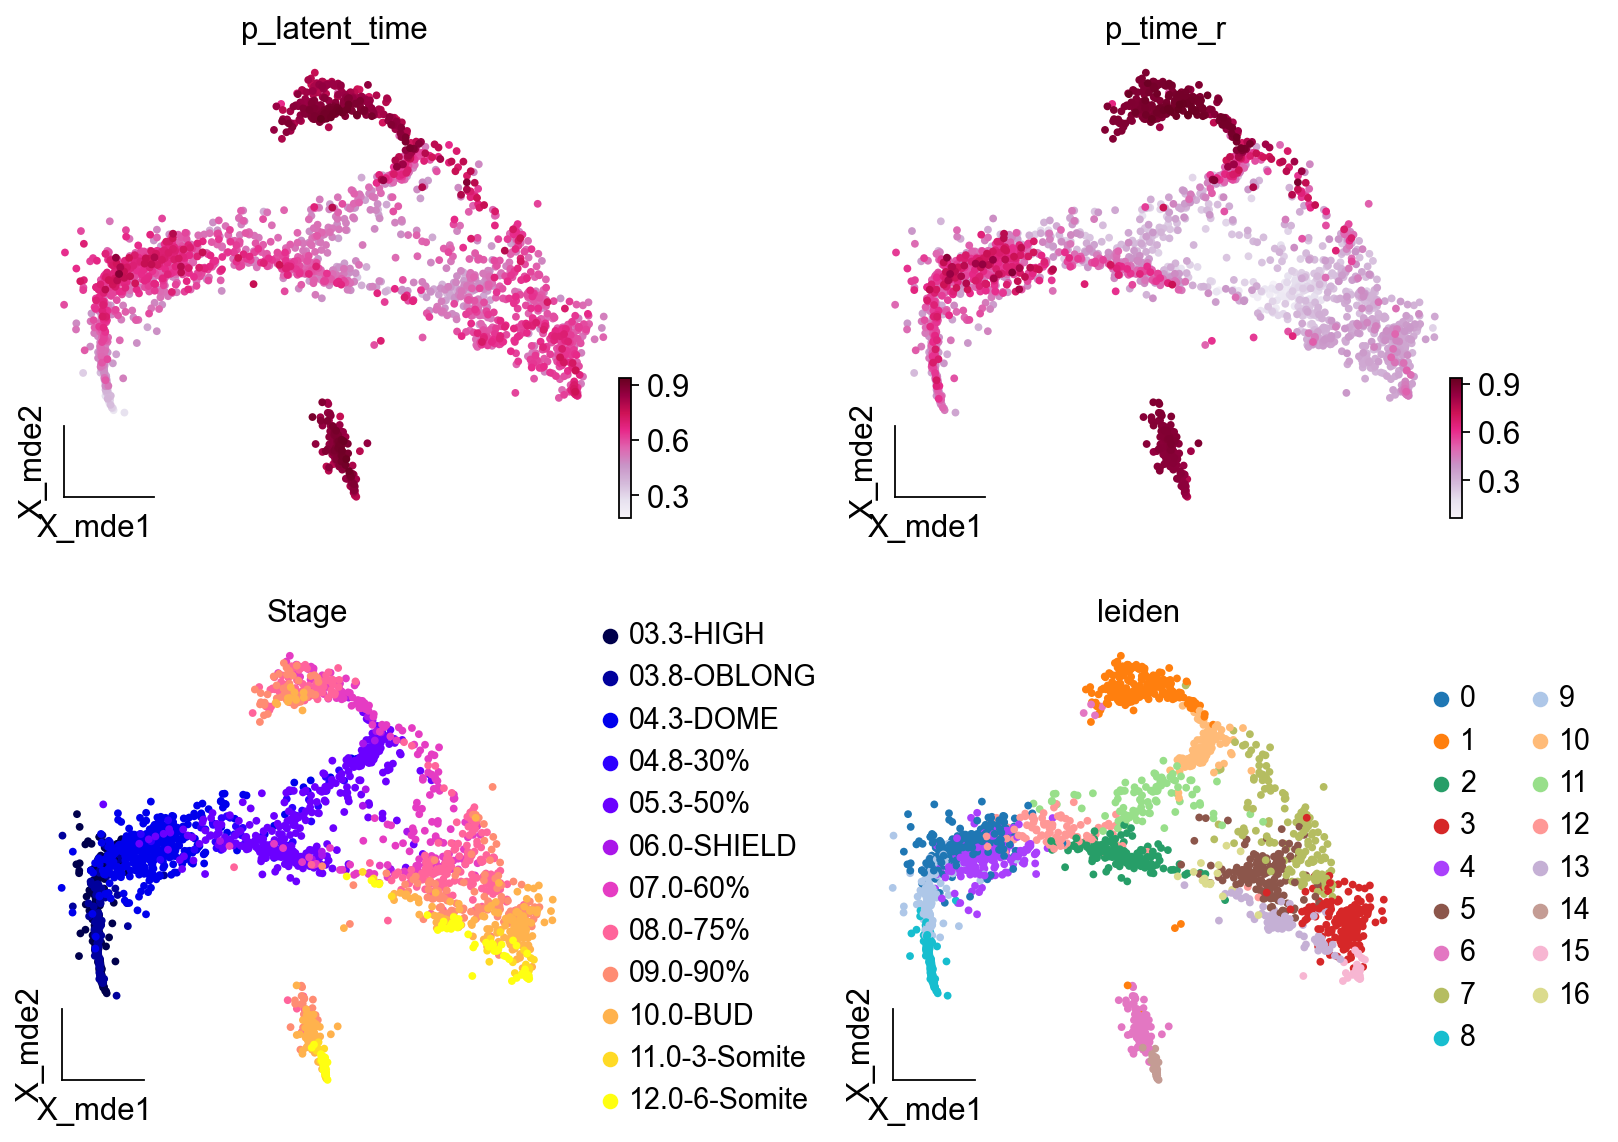

In [196]:
ov.utils.embedding(adata3,basis='X_mde', color=['p_latent_time','p_time_r','Stage','leiden'], 
               cmap='PuRd',legend_loc='right margin',frameon='small',ncols=2,wspace=0.4)

In [208]:
ltnn_obj.cal_dpt_pseudotime(leiden_range_start=0.1,leiden_range_mid=0.02,leiden_range_end=0.02)

......calculate dpt_pseudotime
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9937113  0.9878941  0.97123003 0.96188533 0.9484927
     0.93846184 0.92253417 0.91192305 0.8899675  0.88444966 0.8599434
     0.85288334 0.84886116 0.8433023 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
......leiden_start: ['8']
......leiden_middle ['16', '10', '5']
......leiden_end ['6']


--> added 'pos', the PAGA positions (adata.uns['paga'])


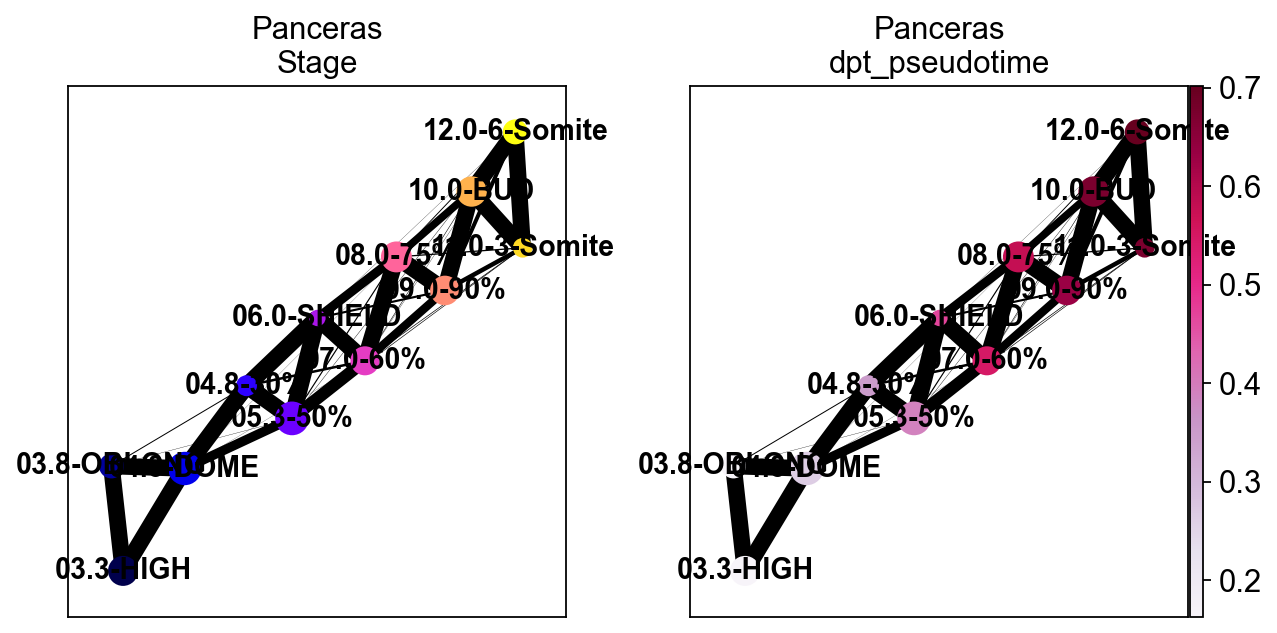

In [209]:
sc.pl.paga(ltnn_obj.adata, color=['Stage','dpt_pseudotime'],cmap='PuRd',
          title=['Panceras\nStage','Panceras\ndpt_pseudotime'],)
          #save='_fig3_pancreas.png')

In [210]:
ltnn_obj.ANN(batch_size=30,n_epochs=200,verbose=0)

......ANN


ANN model: 100%|██████████| 200/200 [00:05<00:00, 36.39it/s, val loss, val mae=0.00210, 0.00210]


In [211]:
ltnn_obj.cal_distrubute()
ltnn_obj.cal_scLTNN_time()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 8.28928] [loc=0.446 scale=0.209]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 21.5424] [loc=0.000 scale=0.446]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 21.5424] [loc=-67108864.000 scale=67108864.000]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 5.64767] [loc=0.432 scale=0.194]


......Dweibull analysis


[distfit] >INFO> [t         ] [0.20 sec] [RSS: 8.28937] [loc=0.446 scale=0.209]
[distfit] >INFO> [genextreme] [0.07 sec] [RSS: 8.02928] [loc=0.364 scale=0.195]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 8.02149] [loc=-0.419 scale=0.051]
[distfit] >INFO> [lognorm   ] [0.06 sec] [RSS: 8.07593] [loc=-0.937 scale=1.368]
[distfit] >INFO> [beta      ] [0.03 sec] [RSS: 7.79439] [loc=-0.042 scale=1.188]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 15.1514] [loc=0.000 scale=1.000]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 8.2833] [loc=-52.097 scale=7.384]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 7.20855] [loc=0.465 scale=0.237]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 20.6852] [loc=-0.027 scale=0.492]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 20.6852] [loc=-33554432.027 scale=33554432.000]
[distfit] >INFO> [dweibull  ] [0.02 sec] [RSS: 5.59902] [loc=0.481 scale=

......Norm analysis


[distfit] >INFO> [t         ] [0.20 sec] [RSS: 7.20862] [loc=0.465 scale=0.237]
[distfit] >INFO> [genextreme] [0.10 sec] [RSS: 7.48904] [loc=0.383 scale=0.238]
[distfit] >INFO> [gamma     ] [0.02 sec] [RSS: 7.2107] [loc=-298.258 scale=0.000]
[distfit] >INFO> [lognorm   ] [0.13 sec] [RSS: 7.26791] [loc=-17.877 scale=18.339]
[distfit] >INFO> [beta      ] [0.03 sec] [RSS: 8.85449] [loc=-0.030 scale=1.058]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 13.2746] [loc=-0.027 scale=1.047]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 7.16617] [loc=-41.793 scale=6.413]
[distfit] >INFO> Compute confidence intervals [parametric]


......calculate scLTNN time


--> added 'pos', the PAGA positions (adata.uns['paga'])


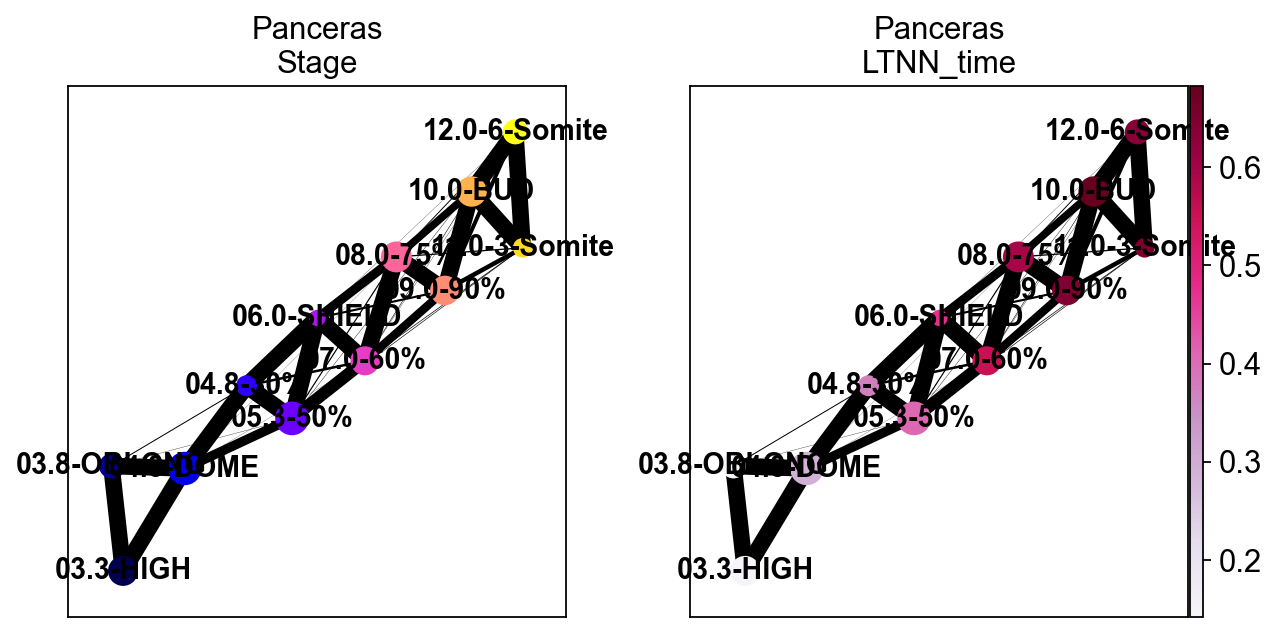

In [212]:
sc.pl.paga(ltnn_obj.adata, color=['Stage','LTNN_time'],cmap='PuRd',
          title=['Panceras\nStage','Panceras\nLTNN_time'],)
          #save='_fig3_pancreas.png')

In [213]:
import scvelo as scv
ltnn_obj.adata.uns['paga_graph']=ltnn_obj.adata.obsp['connectivities']

In [214]:
scv.tl.paga(ltnn_obj.adata, groups='Stage',vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


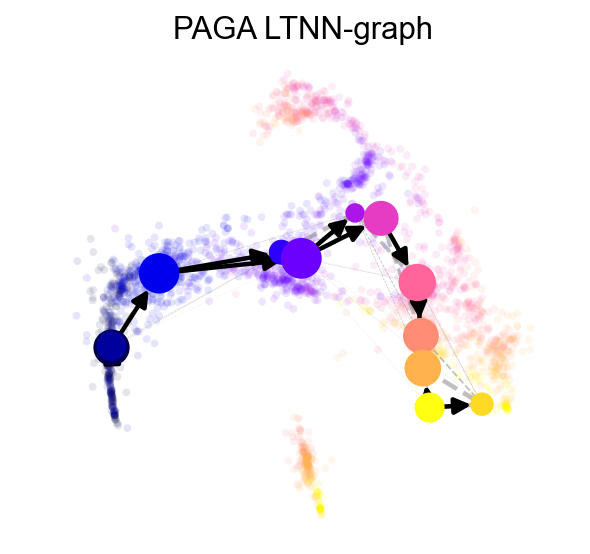

In [215]:
#fig, ax = plt.subplots(figsize=(3,3))
ax=scv.pl.paga(ltnn_obj.adata, basis='mde', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
plt.savefig("figures/fig3/fish_paga_graph.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/fish_paga_graph.pdf",dpi=300,bbox_inches = 'tight')

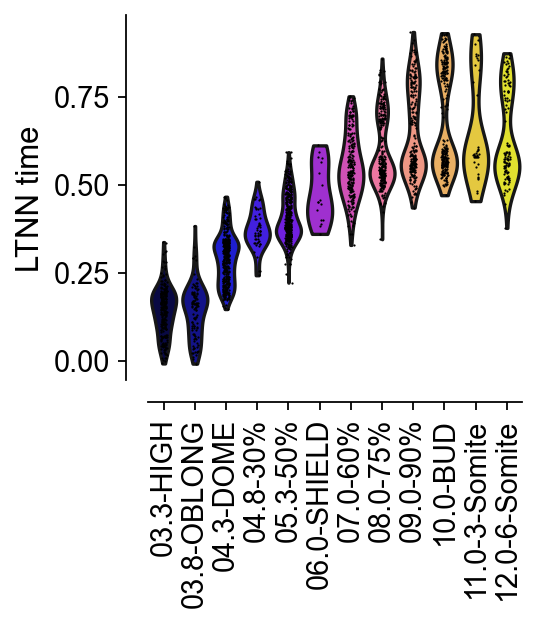

In [216]:
fig, ax = plt.subplots(figsize=(3,3))
fontsize=13
sc.pl.violin(ltnn_obj.adata, keys=["LTNN_time"], ax=ax,
             groupby="Stage", rotation=90,show=False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#ax.set_xlabel('Latent time',fontsize=fontsize)
ax.set_ylabel('LTNN time',fontsize=fontsize+1)
plt.savefig("figures/fig3/fish_violin.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/fish_violin.pdf",dpi=300,bbox_inches = 'tight')


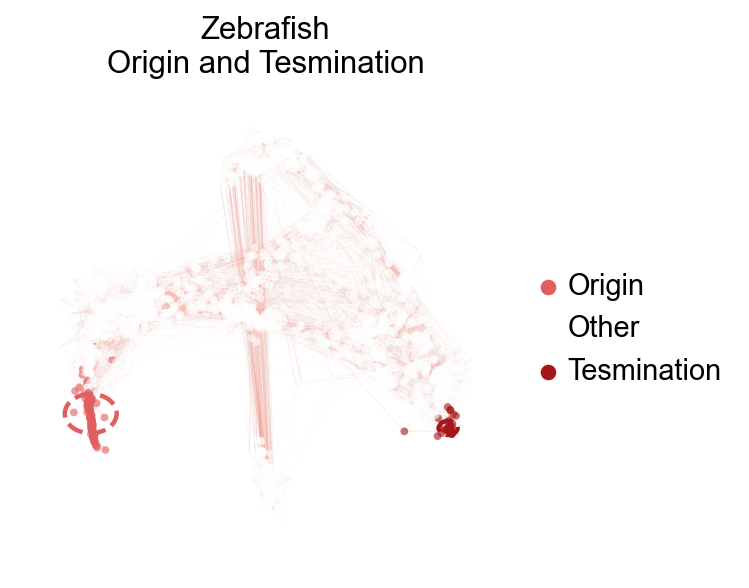

In [206]:
fig,ax=scltnn.models.plot_origin_tesmination(ltnn_obj.adata, basis='X_mde',origin=['8'],tesmination=['15'],
                        edges=True,edges_color='#f4897b',edges_width=0.01,
                       title='Zebrafish\nOrigin and Tesmination',alpha=0.6,
                       frameon=False,legend_fontsize=13,figsize=(4,4))
plt.savefig("figures/fig3/fish_ot.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/fish_ot.pdf",dpi=300,bbox_inches = 'tight')

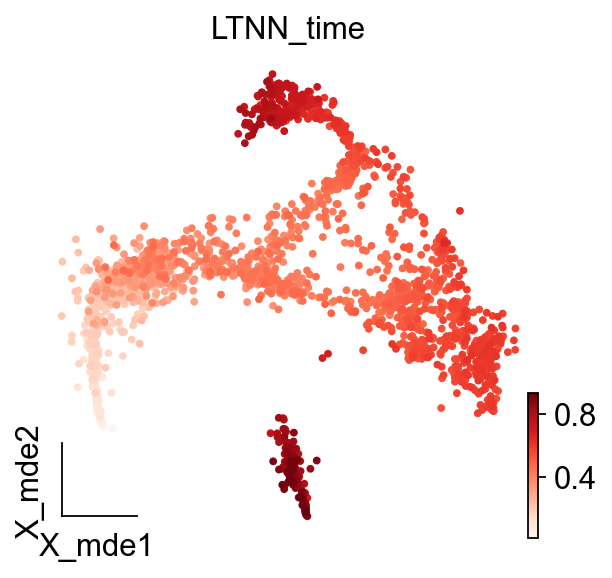

In [207]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(ltnn_obj.adata,basis='X_mde', color=['LTNN_time'], 
               cmap='Reds',legend_loc='right margin',frameon='small',
                   ncols=2,wspace=0.4,show=False,ax=ax)
plt.savefig("figures/fig3/fish_umap_ltnn.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/fish_umap_ltnn.pdf",dpi=300,bbox_inches = 'tight')


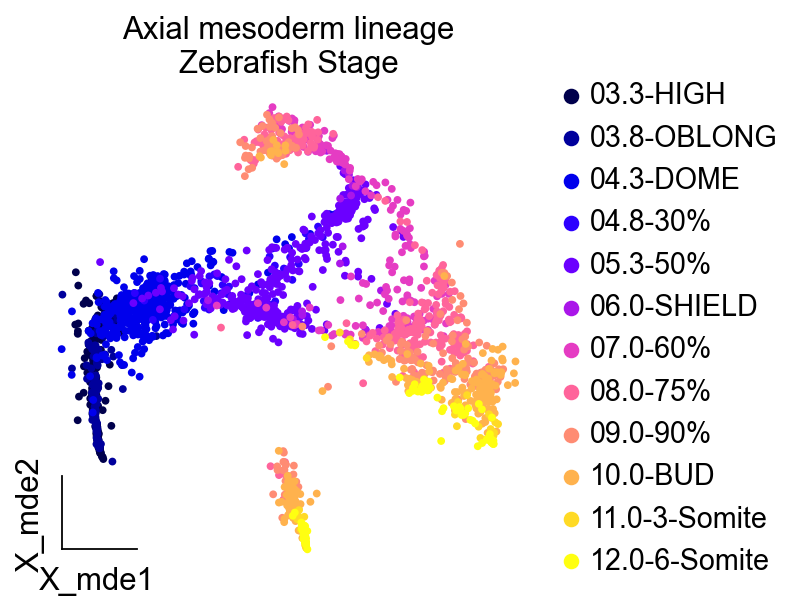

In [218]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(ltnn_obj.adata,basis='X_mde', color=['Stage'], 
               cmap='Reds',legend_loc='right margin',frameon='small',
                   ncols=2,wspace=0.4,show=False,ax=ax)
plt.title('Axial mesoderm lineage\nZebrafish Stage',fontsize=14)
plt.savefig("figures/fig3/fish_umap_celltype.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/fish_umap_celltype.pdf",dpi=300,bbox_inches = 'tight')


In [156]:
import scvelo as scv
ltnn_obj.adata.uns['paga_graph']=ltnn_obj.adata.obsp['connectivities']

In [170]:
scv.tl.paga(ltnn_obj.adata, groups='leiden',vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


--> added 'pos', the PAGA positions (adata.uns['paga'])


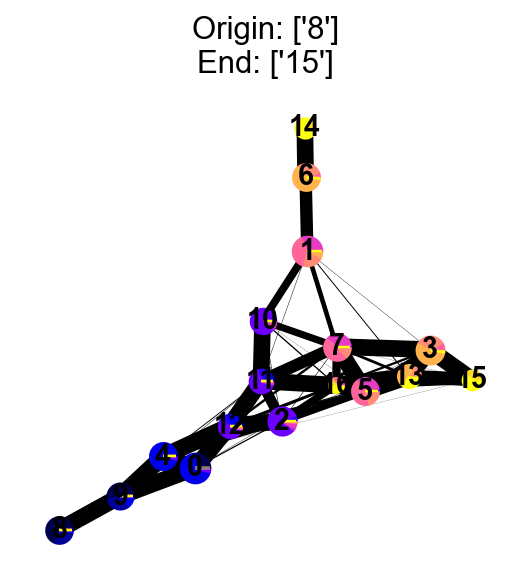

In [165]:
fig, ax = plt.subplots(figsize=(4,4))
origin=['8']
tesmination=['15']
sc.pl.paga(ltnn_obj.adata, color=['Stage'],cmap='PuRd',
          title=[f'Origin: {origin}\nEnd: {tesmination}'],show=False,ax=ax,frameon=False,)
plt.savefig("figures/fig3/fish_paga_leiden.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/fish_paga_leiden.pdf",dpi=300,bbox_inches = 'tight')


--> added 'pos', the PAGA positions (adata.uns['paga'])


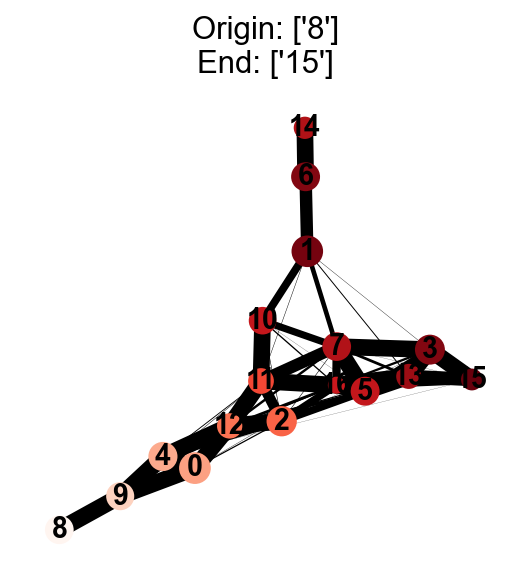

In [174]:
fig, ax = plt.subplots(figsize=(4,4))
origin=['8']
tesmination=['15']
sc.pl.paga(ltnn_obj.adata, color=['LTNN_time'],cmap='Reds',colorbar=False,
          title=[f'Origin: {origin}\nEnd: {tesmination}'],show=False,ax=ax,frameon=False,)
plt.savefig("figures/fig3/fish_paga_ltnn.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/fish_paga_ltnn.pdf",dpi=300,bbox_inches = 'tight')


In [233]:
from cellrank.tl.kernels import PseudotimeKernel
import scvelo as scv
ptk=PseudotimeKernel(ltnn_obj.adata,time_key='dpt_pseudotime')
ptk

<PseudotimeKernel>

In [234]:
ptk.compute_transition_matrix()
ptk.compute_projection(basis="mde")

Computing transition matrix based on `dpt_pseudotime`


  0%|          | 0/2434 [00:00<?, ?cell/s]

    Finish (0:00:00)
Projecting transition matrix onto `mde`
Adding `adata.obsm['T_fwd_mde']`
    Finish (0:00:00)


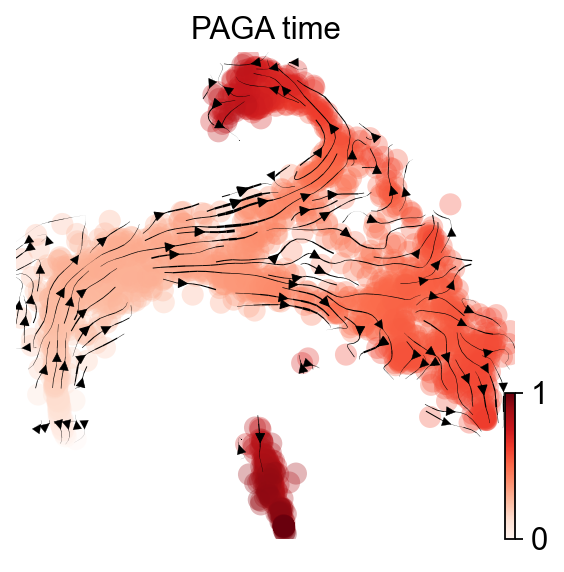

In [235]:
ax=scv.pl.velocity_embedding_stream(
    ltnn_obj.adata,  vkey="T_fwd", basis="mde",color='dpt_pseudotime',
    title='PAGA time',
    legend_loc='right margin',cmap='Reds',show=False
) 
ax.grid(False)
plt.savefig('figures/fig3/fish_velo_paga.png',dpi=300,bbox_inches='tight')

In [236]:
from cellrank.tl.kernels import PseudotimeKernel
ptk=PseudotimeKernel(ltnn_obj.adata,time_key='LTNN_time')
ptk

<PseudotimeKernel>

In [237]:
ptk.compute_transition_matrix()
ptk.compute_projection(basis="mde")

Computing transition matrix based on `LTNN_time`


  0%|          | 0/2434 [00:00<?, ?cell/s]

    Finish (0:00:00)
Projecting transition matrix onto `mde`
Adding `adata.obsm['T_fwd_mde']`
    Finish (0:00:00)


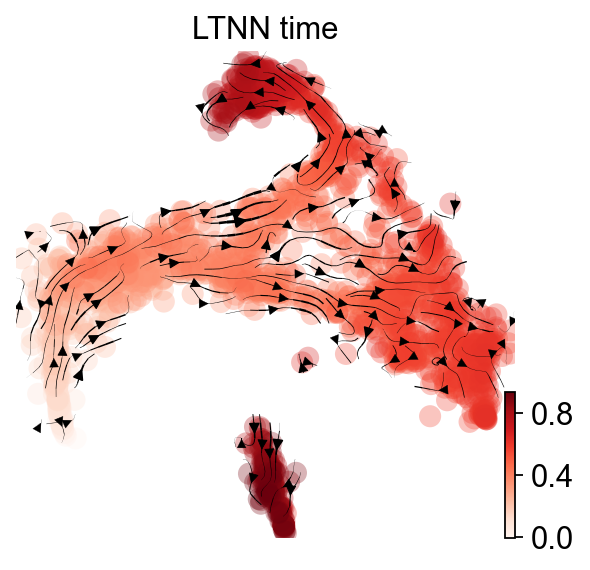

In [238]:
ax=scv.pl.velocity_embedding_stream(
    ltnn_obj.adata,  vkey="T_fwd", basis="mde",color='LTNN_time',
    title='LTNN time',
    legend_loc='right margin',cmap='Reds',show=False
) 
ax.grid(False)
plt.savefig('figures/fig3/fish_velo_ltnn.png',dpi=300,bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
fontsize=13
sc.pl.violin(ltnn_obj.adata, keys=["dpt_pseudotime"], ax=ax,
             groupby="Stage", rotation=90,show=False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#ax.set_xlabel('Latent time',fontsize=fontsize)
ax.set_ylabel('PAGA time',fontsize=fontsize+1)
plt.savefig("figures/fig3/fish_violin_paga.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/fish_violin_paga.pdf",dpi=300,bbox_inches = 'tight')
